# 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x * 3 + 4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1, 1)
y.shape

(100,)

In [4]:
X.shape

(100, 1)

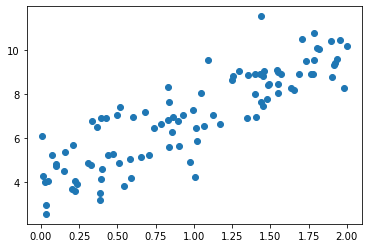

In [5]:
plt.scatter(x, y)
plt.show()

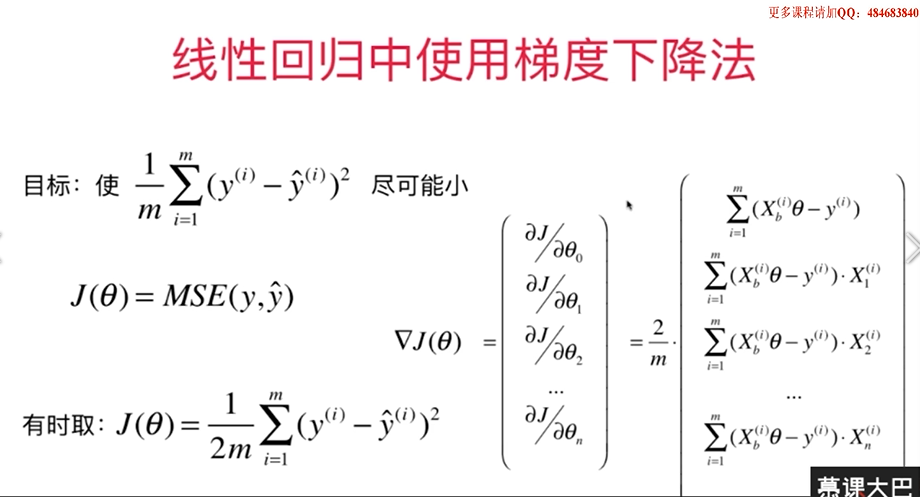

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [7]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

In [8]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=10000, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        print(i_iter, "  ", theta)
        gradient = dJ(theta,  X_b, y)
        last_theta = theta
        print(last_theta)
        theta -= eta * gradient
        print(theta)
        
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

In [9]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1

In [10]:
theta = gradient_descent(X_b, y, initial_theta, eta)

0    [0. 0.]
[0. 0.]
[1.39621569 1.59536786]


In [11]:
theta

array([1.39621569, 1.59536786])

## 封装我们的线性回归算法

In [14]:
%run LinearRegression.py

In [15]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [16]:
lin_reg.coef_

3.0051744690632765

In [17]:
lin_reg.interception_

4.02369667210379

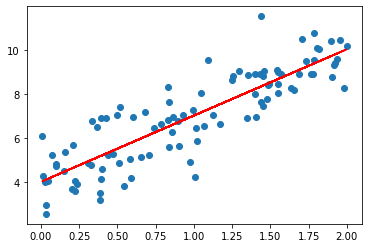

In [19]:
plt.plot(X, lin_reg.coef_*X + lin_reg.interception_, 'r')
plt.scatter(x, y)
plt.show()

-----------------------
# 向量法

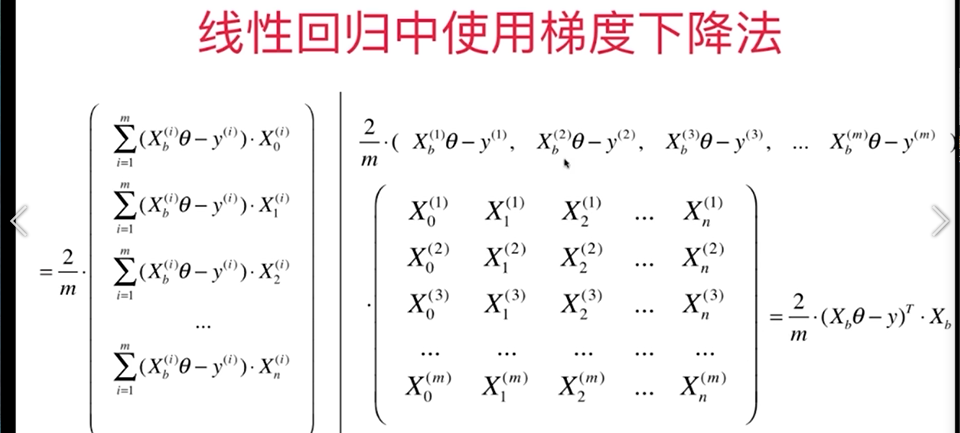